In [1]:
import gzip
import pyfpgrowth 
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
file_path = 'roadNet-CA.txt.gz'

In [5]:
#数据清洗
#某些行的数据事不符合预期的格式，导致无法正确拆分成两个部分。这可能是由于数据文件中存在空行或格式错误的行导致的。
#为了解决这个问题，我们可以添加一些错误处理来跳过这些不符合格式的行。

In [6]:
# 用 gzip 模块打开 gzip 文件
with gzip.open(file_path, 'rt') as file:
    G = nx.DiGraph()
    # 逐行读取文件内容
    for line in file:
        # 尝试按照空格分割数据，并捕获可能的异常
        try:
            # 将每一行数据按照空格分割，并转换成边的起点和终点
            source, target = map(int, line.strip().split())
        
            # 添加边到有向图中
            G.add_edge(source, target)
        except ValueError:
            # 如果无法按照空格分割成两部分，跳过该行数据
            pass
print("完成")

完成


In [7]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 1965206
Number of edges: 5533214


In [14]:
node_degrees = dict(G.degree())
# 根据节点的度过滤节点
filtered_nodes = [node for node, degree in node_degrees.items() if degree > 8]
# 构建新的图
G_filtered = G.subgraph(filtered_nodes)

# 打印过滤后图的基本信息
print("Number of nodes in filtered graph:", G_filtered.number_of_nodes())
print("Number of edges in filtered graph:", G_filtered.number_of_edges())

Number of nodes in filtered graph: 13941
Number of edges in filtered graph: 3118


In [15]:
# 将有向图转换为事务列表
transactions = [[str(edge[0]), str(edge[1])] for edge in G_filtered.edges()]
print("完成")

完成


In [16]:
# 使用FP-Growth算法进行频繁模式挖掘
patterns = pyfpgrowth.find_frequent_patterns(transactions, 0.1)
print("完成")

完成


开始可视化展示...


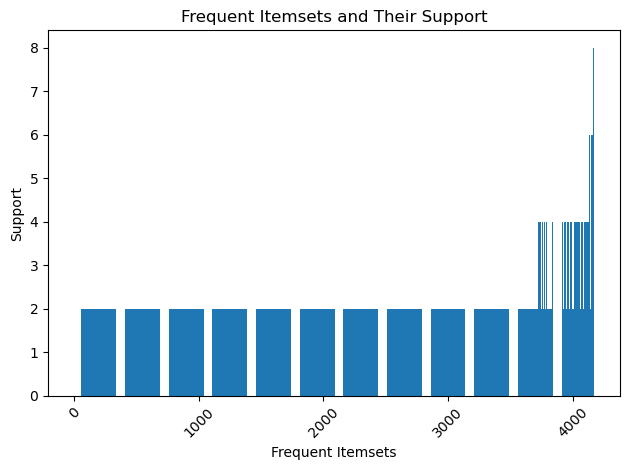

完成


In [20]:
# 可视化频繁模式挖掘结果
print("开始可视化展示...")
plt.bar(range(len(patterns)), patterns.values())
plt.xlabel('Frequent Itemsets')
plt.ylabel('Support')
plt.title('Frequent Itemsets and Their Support')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("完成")

In [21]:
# 找出支持度最高的频繁模式
highest_support_pattern = max(patterns, key=patterns.get)
print("支持度最高的频繁模式:", highest_support_pattern)

支持度最高的频繁模式: ('629367',)


In [18]:
print("频繁模式挖掘结果：")
print(patterns)

频繁模式挖掘结果：
{('1245220',): 2, ('1245106', '1245220'): 2, ('1245106',): 2, ('294999',): 2, ('293911', '294999'): 2, ('293911',): 2, ('295000',): 2, ('292365', '295000'): 2, ('917658',): 2, ('916659', '917658'): 2, ('916659',): 2, ('1671328',): 2, ('1671328', '1681265'): 2, ('1681265',): 2, ('1278149',): 2, ('1267685', '1278149'): 2, ('1267685',): 2, ('1507526',): 2, ('1504176', '1507526'): 2, ('1504176',): 2, ('1966315',): 2, ('1966315', '1966319'): 2, ('1966319',): 2, ('164106',): 2, ('164106', '164259'): 2, ('164259',): 2, ('1343802',): 2, ('1306374', '1343802'): 2, ('1306374',): 2, ('1474889',): 2, ('1474889', '1474975'): 2, ('622956',): 2, ('610155', '622956'): 2, ('610155',): 2, ('1343878',): 2, ('1343878', '1343880'): 2, ('1343880',): 2, ('1442187',): 2, ('1442187', '1442189'): 2, ('1442189',): 2, ('1278367',): 2, ('1278367', '1278368'): 2, ('1278368',): 2, ('1474988',): 2, ('1474984', '1474988'): 2, ('1638825',): 2, ('1638825', '1639167'): 2, ('1639167',): 2, ('1180104',): 2, ('117

In [ ]:
#命名为 "道路交叉模式"。因为有向图的节点表示道路的端点，而频繁模式 ('629367',) 可能表示了一种特定的道路交叉情况，即节点 629367 是一个交叉点，道路在此处交叉。